In [ ]:
from math import e
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
h = 0.4
a = 0
b = 2


### Численное дифференцирование

Суть численного дифференцирования сводится к прицнипу - бесконечно малые величины заменяются конечными разностями. Точность определяется длиной интервала. 

1. Реализуем методы численного дифференцирования: 

In [ ]:
def left_difference(f, x, h):
  return(f(x) - f(x - h)) / h

In [ ]:
def right_difference(f, x, h):
  return(f(x + h) - f(x)) / h

In [ ]:
def central_difference(f, x, h):
  return(f(x + h) - f(x - h)) / (2 * h)

2. Возьмём две произвольные функции:

In [ ]:
def f1(x):
  return x * e ** (-x)

In [ ]:
def f1_d(x):
  return e ** (-x) - x * e ** (-x)

In [ ]:
def f2(x):
  return x ** 2 * np.cos(x)

In [ ]:
def f2_d(x):
  return 2 * x * np.cos(x) - x ** 2 * np.sin(x)

Вычислим аналитически их производные:
\begin{equation}
    f_1(x) = xe^{-x}
\end{equation}
\begin{equation}
    f_1'(x) = (xe^{-x})'_x = (x)'_x·e^{-x} + (e^{-x})'_x·x = e^{-x}-xe^{-x}
\end{equation}

\begin{equation}
    f_2(x) = x^2cosx
\end{equation}
\begin{equation}
    f_2'(x) = (x^2cosx)'_x = (x^2)'_x·cosx + (cosx)'_x·x^2 = 2xcosx - x^2sinx
\end{equation}

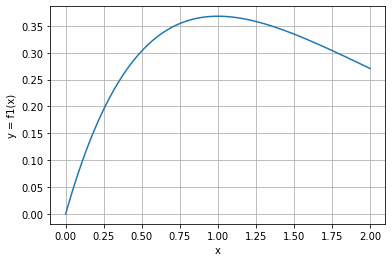

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 2, 100)
y = x * e ** (-x)

ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y = f1(x)')
plt.grid()
plt.show()

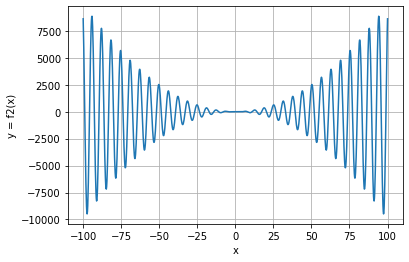

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-100, 100, 1000)
y = x ** 2 * np.cos(x)

ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y = f2(x)')
plt.grid()
plt.show()

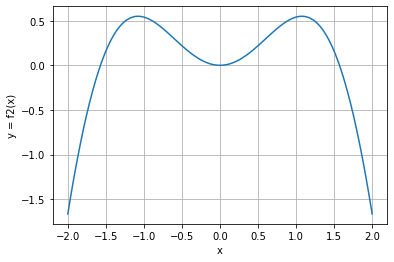

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-2, 2, 100)
y = x ** 2 * np.cos(x)

ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y = f2(x)')
plt.grid()
plt.show()

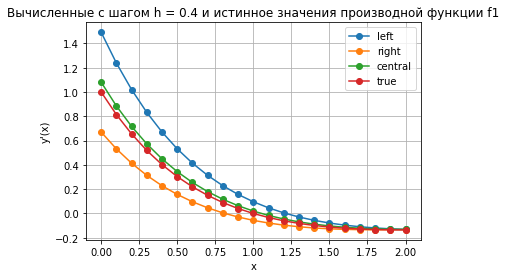

In [ ]:
df_f1 = pd.DataFrame({'x':[], 'y\'(left)':[], 'y\'(right)':[], 'y\'(central)':[], 'y\'(true)':[]})
for x in np.arange(a, b + 0.1, 0.1): 
  df_f1.loc[len(df_f1.index)] = [x, left_difference(f1, x, h), right_difference(f1, x, h), central_difference(f1, x, h), f1_d(x)]

x = df_f1['x']
plt.plot(x, df_f1['y\'(left)'], label="left", marker='o')
plt.plot(x, df_f1['y\'(right)'], label="right", marker='o')
plt.plot(x, df_f1['y\'(central)'], label="central", marker='o')
plt.plot(x, df_f1['y\'(true)'], label="true", marker='o')

plt.title("Вычисленные с шагом h = 0.4 и истинное значения производной функции f1")   
plt.ylabel('y\'(x)')   
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_f1

,x,y'(left),y'(right),y'(central),y'(true)
0,0.0,1.491825,0.670320,1.081072,1.000000
1,0.1,1.238603,0.531954,0.885279,0.814354
2,0.2,1.020067,0.413852,0.716959,0.654985
3,0.3,0.831906,0.313411,0.572659,0.518573
4,0.4,0.670320,0.228338,0.449329,0.402192
5,0.5,0.531954,0.156618,0.344286,0.303265
6,0.6,0.413852,0.096481,0.255167,0.219525
7,0.7,0.313411,0.046371,0.179891,0.148976
8,0.8,0.228338,0.004925,0.116631,0.089866
9,0.9,0.156618,-0.029053,0.063783,0.040657


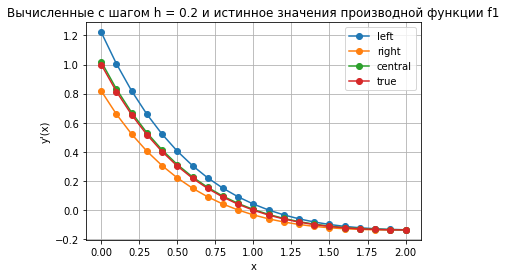

In [ ]:
df_f1 = pd.DataFrame({'x':[], 'y\'(left)':[], 'y\'(right)':[], 'y\'(central)':[], 'y\'(true)':[]})
for x in np.arange(a, b + 0.1, 0.1): 
  df_f1.loc[len(df_f1.index)] = [x, left_difference(f1, x, h/2), right_difference(f1, x, h/2), central_difference(f1, x, h/2), f1_d(x)]

x = df_f1['x']
plt.plot(x, df_f1['y\'(left)'], label="left", marker='o')
plt.plot(x, df_f1['y\'(right)'], label="right", marker='o')
plt.plot(x, df_f1['y\'(central)'], label="central", marker='o')
plt.plot(x, df_f1['y\'(true)'], label="true", marker='o')

plt.title("Вычисленные с шагом h = 0.2 и истинное значения производной функции f1")   
plt.ylabel('y\'(x)')   
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

3. Найдём среднеквадратичные отклонения численных от истинных значений производной:

In [ ]:
msds_f1 = pd.DataFrame({'h':[], 'left':[], 'right':[], 'central':[]})
h_vars = [0.4, 0.2, 0.1, 0.05, 0.025]
for h_var in h_vars:
  df_f1 = pd.DataFrame({'x':[], 'y\'(left)':[], 'y\'(right)':[], 'y\'(central)':[], 'y\'(true)':[]})
  for x in np.arange(a, b + 0.1, 0.1): 
    df_f1.loc[len(df_f1.index)] = [x, left_difference(f1, x, h_var), right_difference(f1, x, h_var), central_difference(f1, x, h_var), f1_d(x)]
  msd_left = np.sqrt(np.sum((df_f1['y\'(left)'] - df_f1['y\'(true)']) ** 2) / (len(df_f1.index) - 1))
  msd_right = np.sqrt(np.sum((df_f1['y\'(right)'] - df_f1['y\'(true)']) ** 2) / (len(df_f1.index) - 1))
  msd_central = np.sqrt(np.sum((df_f1['y\'(central)'] - df_f1['y\'(true)']) ** 2) / (len(df_f1.index) - 1))
  msds_f1.loc[len(msds_f1.index)] = [h_var, msd_left, msd_right, msd_central]
msds_f1

,h,left,right,central
0,0.400,0.212335,0.138966,0.036863
1,0.200,0.095006,0.076857,0.009119
2,0.100,0.044994,0.040468,0.002274
3,0.050,0.021901,0.020771,0.000568
4,0.025,0.010806,0.010523,0.000142


4. Покажем зависимость среднеквадратичного отклонения
от величины шага:

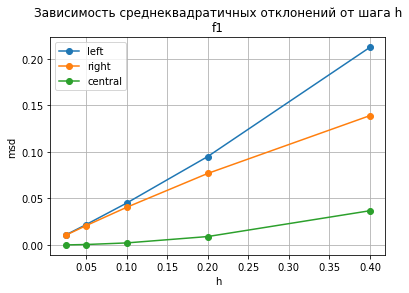

In [ ]:
x = msds_f1['h']
plt.plot(x, msds_f1['left'], label="left", marker='o')
plt.plot(x, msds_f1['right'], label="right", marker='o')
plt.plot(x, msds_f1['central'], label="central", marker='o')

plt.title("Зависимость среднеквадратичных отклонений от шага h\nf1")   
plt.ylabel('msd')   
plt.xlabel('h')
plt.legend()
plt.grid()
plt.show()

Аналогично 3 и 4 пункты для второй функции:

In [ ]:
msds_f2 = pd.DataFrame({'h':[], 'left':[], 'right':[], 'central':[]})
h_vars = [0.4, 0.2, 0.1, 0.05, 0.025]
for h_var in h_vars:
  df_f2 = pd.DataFrame({'x':[], 'y\'(left)':[], 'y\'(right)':[], 'y\'(central)':[], 'y\'(true)':[]})
  for x in np.arange(a, b + 0.1, 0.1): 
    df_f2.loc[len(df_f2.index)] = [x, left_difference(f2, x, h_var), right_difference(f2, x, h_var), central_difference(f2, x, h_var), f2_d(x)]
  msd_left = np.sqrt(np.sum((df_f2['y\'(left)'] - df_f2['y\'(true)']) ** 2) / (len(df_f2.index) - 1))
  msd_right = np.sqrt(np.sum((df_f2['y\'(right)'] - df_f2['y\'(true)']) ** 2) / (len(df_f2.index) - 1))
  msd_central = np.sqrt(np.sum((df_f2['y\'(central)'] - df_f2['y\'(true)']) ** 2) / (len(df_f2.index) - 1))
  msds_f2.loc[len(msds_f2.index)] = [h_var, msd_left, msd_right, msd_central]
msds_f2

,h,left,right,central
0,0.400,0.786971,0.894758,0.133677
1,0.200,0.412538,0.439897,0.034006
2,0.100,0.210404,0.217270,0.008539
3,0.050,0.106151,0.107869,0.002137
4,0.025,0.053301,0.053731,0.000534


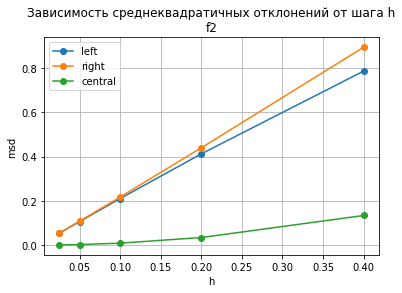

In [ ]:
x = msds_f2['h']
plt.plot(x, msds_f2['left'], label="left", marker='o')
plt.plot(x, msds_f2['right'], label="right", marker='o')
plt.plot(x, msds_f2['central'], label="central", marker='o')

plt.title("Зависимость среднеквадратичных отклонений от шага h\nf2")   
plt.ylabel('msd')   
plt.xlabel('h')
plt.legend()
plt.grid()
plt.show()

### Численное интегрирование

5. Реализуем методы численного интегрирования

In [ ]:
def left_int(func, i, h):
    return h * func(a + (i - 1) * h)


def right_int(func, i, h):
    return h * func(a + i * h)


def central_int(func, i, h):
    return h * func(a + (i - 0.5) * h)


def trapezoid_int(func, i, h):
    return (h / 2) * (func(a + (i - 1) * h) + func(a + i * h))


def simpson_int(func, i, h):
    return (h / 6) * (func(a + (i - 1) * h) + 4 * func(a + (i - 0.5) * h) + func(a + i * h))

И суммирующую функцию

In [ ]:
def integrate(func, int_method, h):
    integral = 0
    n = int((b - a) / h)
    for k in range(1, n + 1):
        integral += int_method(func, k, h)
    return integral

6. Возьмем те же функции, что и для численного дифференцирования, и интегрируем их аналитически
\begin{gather}
  f_1(x) = xe^{-x} \\
  I_1 = \int\limits_0^2 f_1(x)dx = \left. -(x+1)e^{-x}\right|_0^2 \\
  f_2(x) = x^2\cos x \\
  I_2 = \int\limits_0^2 f_2(x)dx = \left.\left(\left(x^2 - 2\right)\sin x + 2x\cos x\right) \right|_0^2
\end{gather}

In [ ]:
def f1_int():
  return -(b + 1) * e**(-b) + (a + 1) * e**(-a)

def f2_int():
  return ((b**2 - 2) * np.sin(b) + 2 * b * np.cos(b)) - ((a**2 - 2) * np.sin(a) + 2 * a * np.cos(a))

Сравним значение интегралов, полученные численным методом, со значениями, полученным аналитически для $h = 0.4$

In [ ]:
int_res = pd.DataFrame({'true': [], 'left':[], 'right':[], 'central':[], 'trapezoid': [], 'simpson': []})
int_methods = [left_int, right_int, central_int, trapezoid_int, simpson_int]
int_res.loc[len(int_res)] = [f1_int()] + [integrate(f1, method, h) for method in int_methods]
int_res.loc[len(int_res)] = [f2_int()] + [integrate(f2, method, h) for method in int_methods]
int_res.index = ['f1(x)', 'f2(x)']
int_res

,true,left,right,central,trapezoid,simpson
f1(x),0.593994,0.524823,0.633092,0.601475,0.578958,0.593969
f2(x),0.154008,0.416123,-0.249712,0.189451,0.083205,0.154035


7. Вычислим отклонения от истинных значений при различных значениях $h$

In [ ]:
def integration_error(func, h, func_true):
    int_methods = [left_int, right_int, central_int, trapezoid_int, simpson_int]
    return [abs(integrate(func, method, h) - func_true) for method in int_methods]

In [ ]:
diffs_f1 = pd.DataFrame({'h':[], 'left':[], 'right':[], 'central':[], 'trapezoid': [], 'simpson': []})
h_vars = [0.4, 0.2, 0.1, 0.05, 0.025]
for h_var in h_vars:
  diffs_f1.loc[len(diffs_f1.index)] = [h_var] + integration_error(f1, h_var, f1_int())
diffs_f1

,h,left,right,central,trapezoid,simpson
0,0.400,0.069171,0.039098,0.007480,0.015037,2.527035e-05
1,0.200,0.030845,0.023289,0.001887,0.003778,1.588446e-06
2,0.100,0.014479,0.012588,0.000473,0.000946,9.942007e-08
3,0.050,0.007003,0.006530,0.000118,0.000237,6.215979e-09
4,0.025,0.003443,0.003324,0.000030,0.000059,3.885332e-10


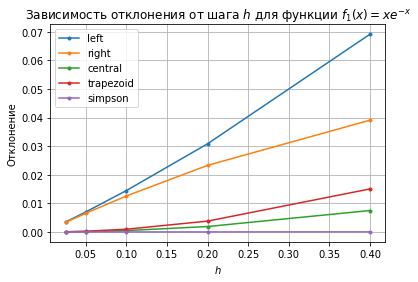

In [ ]:
x = diffs_f1['h']
plt.plot(x, diffs_f1['left'], label="left", marker='.')
plt.plot(x, diffs_f1['right'], label="right", marker='.')
plt.plot(x, diffs_f1['central'], label="central", marker='.')
plt.plot(x, diffs_f1['trapezoid'], label="trapezoid", marker='.')
plt.plot(x, diffs_f1['simpson'], label="simpson", marker='.')

plt.title("Зависимость отклонения от шага $h$ для функции $f_1(x) = xe^{-x}$")
plt.ylabel('Отклонение')
plt.xlabel('$h$')
plt.legend()
plt.grid()
plt.show()

In [ ]:
diffs_f2 = pd.DataFrame({'h':[], 'left':[], 'right':[], 'central':[], 'trapezoid': [], 'simpson': []})
h_vars = [0.4, 0.2, 0.1, 0.05, 0.025]
for h_var in h_vars:
  diffs_f2.loc[len(diffs_f2.index)] = [h_var] + integration_error(f2, h_var, f2_int())
diffs_f2

,h,left,right,central,trapezoid,simpson
0,0.400,0.262115,0.403720,0.035443,0.070802,2.795608e-05
1,0.200,0.148779,0.184138,0.008842,0.017680,1.759848e-06
2,0.100,0.078811,0.087648,0.002209,0.004419,1.101845e-07
3,0.050,0.040510,0.042719,0.000552,0.001105,6.889548e-09
4,0.025,0.020531,0.021083,0.000138,0.000276,4.306437e-10


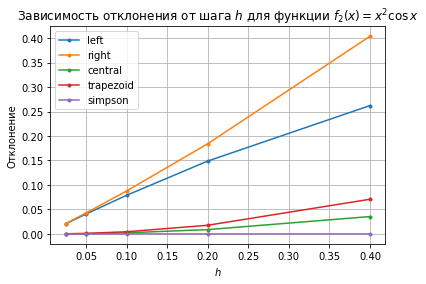

In [ ]:
x = diffs_f2['h']
plt.plot(x, diffs_f2['left'], label="left", marker='.')
plt.plot(x, diffs_f2['right'], label="right", marker='.')
plt.plot(x, diffs_f2['central'], label="central", marker='.')
plt.plot(x, diffs_f2['trapezoid'], label="trapezoid", marker='.')
plt.plot(x, diffs_f2['simpson'], label="simpson", marker='.')

plt.title("Зависимость отклонения от шага $h$ для функции $f_2(x) = x^2\cos x$")
plt.ylabel('Отклонение')
plt.xlabel('$h$')
plt.legend()
plt.grid()
plt.show()
plt.show()